## Problem Statement

Claimants

## 1. Import Libraries

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
claimants=pd.read_csv('..\\may 5 batch codes\\Data files\\claimants.csv')

In [3]:
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


## 3. Data Understanding

In [4]:
claimants.shape

(1340, 7)

In [5]:
claimants.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
claimants.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

## 4. Data Preparation || Cleaning

In [7]:
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [8]:
del claimants['CASENUM']

In [9]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [10]:
claimants.dropna(inplace=True)

In [11]:
claimants.shape

(1096, 6)

In [12]:
claimants.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [13]:
claimants.dtypes

ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

### 5. Model Building

In [14]:
X=claimants.drop('ATTORNEY',axis=1)
y=claimants[['ATTORNEY']]

### Model Validation Techniques

* Train_Test_Split
* K-Fold
* LOOCV

#### Train_Test_Split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12,shuffle=True)

In [16]:
X_train.shape,y_train.shape

((876, 5), (876, 1))

In [17]:
X_test.shape,y_test.shape

((220, 5), (220, 1))

#### K - Fold CV

In [26]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier=AdaBoostClassifier()
adaboost_classifier.fit(X_train,y_train)

AdaBoostClassifier()

In [27]:
kfold=KFold(n_splits=5,shuffle=True, random_state=12)

In [28]:
cv_scores=cross_val_score(estimator=adaboost_classifier,X=X,y=y,cv=kfold)
print('cv scores :',cv_scores)
print('cv scores - Mean Accuracy:',cv_scores.mean())
print('cv scores - Std:',cv_scores.std())

cv scores : [0.69090909 0.72146119 0.77625571 0.74885845 0.67579909]
cv scores - Mean Accuracy: 0.7226567040265669
cv scores - Std: 0.03678141122124876


#### LOOCV

In [29]:
from sklearn.model_selection import LeaveOneOut

In [30]:
Loocv = LeaveOneOut()

In [31]:
cv_scores=cross_val_score(estimator=adaboost_classifier,X=X,y=y,cv=Loocv)
print('cv scores :',cv_scores)
print('cv scores - Mean Accuracy:',cv_scores.mean())
print('cv scores - Std:',cv_scores.std())

cv scores : [1. 1. 0. ... 1. 1. 1.]
cv scores - Mean Accuracy: 0.7235401459854015
cv scores - Std: 0.44724691517418586


## 6. Model Training

In [32]:
from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=12)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=12)

In [34]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

rf_classifier=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=12)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, random_state=12)

#### Grid Search CV

In [72]:
from sklearn.model_selection import GridSearchCV
gridsearchcv=GridSearchCV(estimator=dt_classifier,
                          param_grid={'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9]},
                          cv=5)
gridsearchcv.fit(X,y)

print(gridsearchcv.best_params_)
print(gridsearchcv.best_score_)

{'criterion': 'gini', 'max_depth': 3}
0.7326400996264011


In [36]:
from sklearn.model_selection import GridSearchCV
gridsearchcv=GridSearchCV(estimator=rf_classifier,
                          param_grid={'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9]},
                          cv=5,)
gridsearchcv.fit(X,y)

print(gridsearchcv.best_params_)
print(gridsearchcv.best_score_)

{'criterion': 'gini', 'max_depth': 5}
0.732640099626401


### Stacking Technique

In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

svc_model=SVC()

stacking_model=VotingClassifier(estimators=[('log',logistic_model),('dt',dt_classifier),('svc',svc_model)])
stacking_model.fit(X_train,y_train)

VotingClassifier(estimators=[('log', LogisticRegression()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=12)),
                             ('svc', SVC())])

In [38]:
y_pred_test=stacking_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.6909090909090909

### Build Tree

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

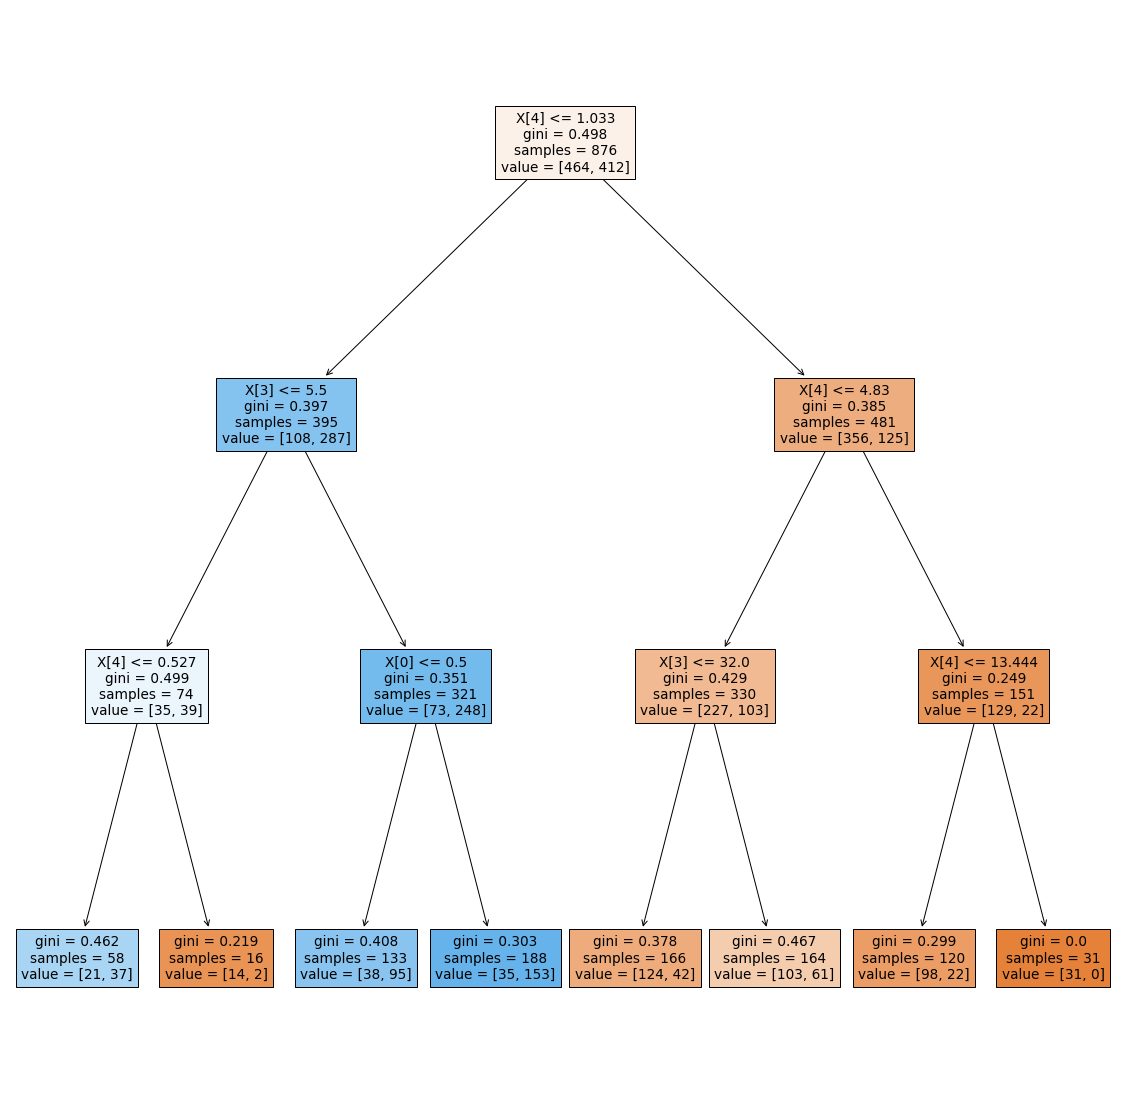

In [41]:
plt.figure(figsize=(20,20))
plot_tree(decision_tree=dt_classifier,filled=True)
plt.show()

In [42]:
logistic_model.coef_

array([[ 0.35680679,  0.67570996, -0.57875527,  0.00657283, -0.39132083]])

In [43]:
logistic_model.intercept_

array([-0.20995559])

### 7.  Model Testing & Model Evaluation

### Using Logistic Regression

In [44]:
y_logic_train_pred=logistic_model.predict(X_train)
y_logic_test_pred=logistic_model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [46]:
accuracy_score(y_train,y_logic_train_pred)

0.7111872146118722

In [47]:
accuracy_score(y_test,y_logic_test_pred)

0.6863636363636364

In [48]:
print(classification_report(y_train,y_logic_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       464
           1       0.67      0.76      0.71       412

    accuracy                           0.71       876
   macro avg       0.71      0.71      0.71       876
weighted avg       0.72      0.71      0.71       876



In [49]:
print(classification_report(y_test,y_logic_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       114
           1       0.65      0.75      0.70       106

    accuracy                           0.69       220
   macro avg       0.69      0.69      0.69       220
weighted avg       0.69      0.69      0.69       220



In [50]:
confusion_matrix(y_train,y_logic_train_pred)

array([[309, 155],
       [ 98, 314]], dtype=int64)

In [51]:
confusion_matrix(y_test,y_logic_test_pred)

array([[72, 42],
       [27, 79]], dtype=int64)

### Using Decision Tree Classifier

In [52]:
y_dt_train_pred=dt_classifier.predict(X_train)
y_dt_test_pred=dt_classifier.predict(X_test)

In [53]:
accuracy_score(y_train,y_dt_train_pred)

0.747716894977169

In [54]:
accuracy_score(y_test,y_dt_test_pred)

0.6909090909090909

In [55]:
print(classification_report(y_train,y_dt_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       464
           1       0.75      0.69      0.72       412

    accuracy                           0.75       876
   macro avg       0.75      0.74      0.75       876
weighted avg       0.75      0.75      0.75       876



In [56]:
print(classification_report(y_test,y_dt_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       114
           1       0.67      0.71      0.69       106

    accuracy                           0.69       220
   macro avg       0.69      0.69      0.69       220
weighted avg       0.69      0.69      0.69       220



In [57]:
confusion_matrix(y_train,y_dt_train_pred)

array([[370,  94],
       [127, 285]], dtype=int64)

In [58]:
confusion_matrix(y_test,y_dt_test_pred)

array([[77, 37],
       [31, 75]], dtype=int64)

### Using Adaboost Classifier

In [59]:
y_ada_train_pred=adaboost_classifier.predict(X_train)
y_ada_test_pred=adaboost_classifier.predict(X_test)

In [60]:
accuracy_score(y_train,y_ada_train_pred)

0.752283105022831

In [61]:
accuracy_score(y_test,y_ada_test_pred)

0.6909090909090909

In [62]:
print(classification_report(y_train,y_ada_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       464
           1       0.76      0.69      0.72       412

    accuracy                           0.75       876
   macro avg       0.75      0.75      0.75       876
weighted avg       0.75      0.75      0.75       876



In [63]:
print(classification_report(y_test,y_ada_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       114
           1       0.67      0.71      0.69       106

    accuracy                           0.69       220
   macro avg       0.69      0.69      0.69       220
weighted avg       0.69      0.69      0.69       220



In [64]:
confusion_matrix(y_train,y_ada_train_pred)

array([[373,  91],
       [126, 286]], dtype=int64)

In [65]:
confusion_matrix(y_test,y_ada_test_pred)

array([[77, 37],
       [31, 75]], dtype=int64)

### ROC Curve, Score

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score

In [67]:
x=adaboost_classifier.predict_proba(X_train)[:,1]

In [68]:
fpr,tpr,thresholds = roc_curve(y_train,y_ada_train_pred)
#fpr,tpr,thresholds = roc_curve(y_train,adaboost_classifier.predict_proba (X_train)[:,1])

Roc Auc Score : 0.7490270338131905


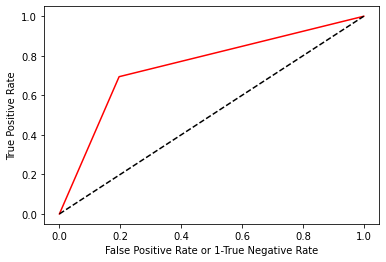

In [69]:
score=roc_auc_score(y_train,y_ada_train_pred)
print("Roc Auc Score :",score)

plt.plot(fpr, tpr, color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate or 1-True Negative Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [70]:
fpr,tpr,thresholds = roc_curve(y_test,y_ada_test_pred)
#fpr,tpr,thresholds = roc_curve(y_test,adaboost_classifier.predict_proba (X_test)[:,1])

Roc Auc Score : 0.6914928831512743


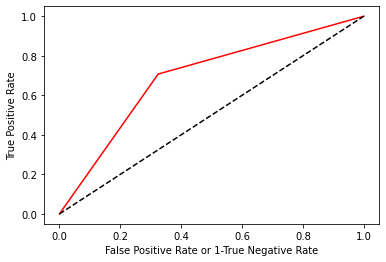

In [71]:
score=roc_auc_score(y_test,y_ada_test_pred)
print("Roc Auc Score :",score)

plt.plot(fpr, tpr, color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate or 1-True Negative Rate")
plt.ylabel("True Positive Rate")
plt.show()

### End